# TP1 - Menceyra - Viaggio

### Pipeline: 
(1) Detección y descripción de Características visuales (features)

(2) Supresion no Máxima Adaptativa

(3) Asociación de características (Matching)

(4) Estimación de la homografía "manualmente"

(5) RANSAC para eliminación de outliers y estimación de homografías

(6) Cálculo de tamaño óptimo para imagen final

(7) Juntando y mezclando imágenes (Stitching and Blending)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from pathlib import Path
from imgs_prep_vis import imread_rgb, resize_width, visualize_keypoints, visualize_comparison
from utils import anms_select

In [2]:
# Configuración
IMG_DIR = Path("img")
UDESA = ["udesa_0.jpg", "udesa_1.jpg", "udesa_2.jpg"]
CUADRO = ["cuadro_0.jpg", "cuadro_1.jpg", "cuadro_2.jpg"]
NUESTRA = ["nuestra_0.jpg", "nuestra_1.jpg", "nuestra_2.jpg"]
ANCHOR_IDX = 1  # Imagen ancla
RESIZE_W = 1000  # Ancho al que se redimensionan las imágenes

### UDESA
### (1)

In [3]:
# Carga y procesamiento de imágenes (UDESA)
imgs_udesa_rgb, imgs_udesa_gray = [], []
for u in UDESA:
    img_rgb = imread_rgb(IMG_DIR / u)
    img_rgb = resize_width(img_rgb, RESIZE_W)
    imgs_udesa_rgb.append(img_rgb)
    img_udesa_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    imgs_udesa_gray.append(img_udesa_gray)

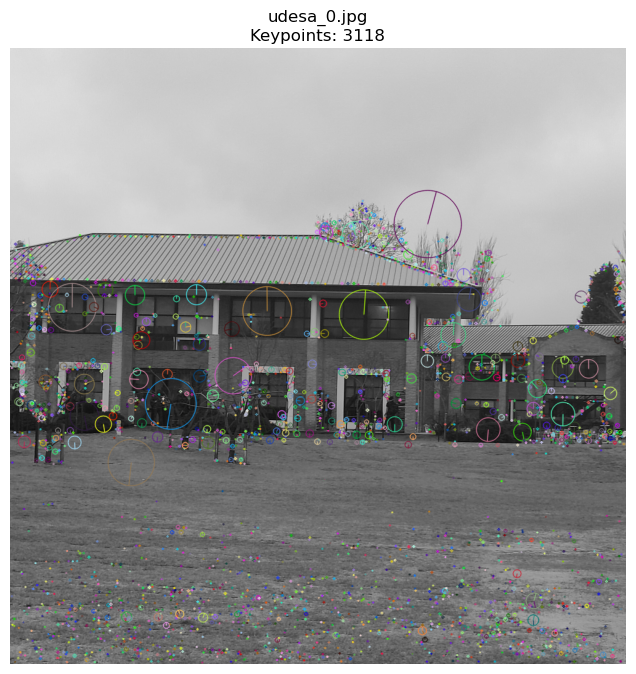

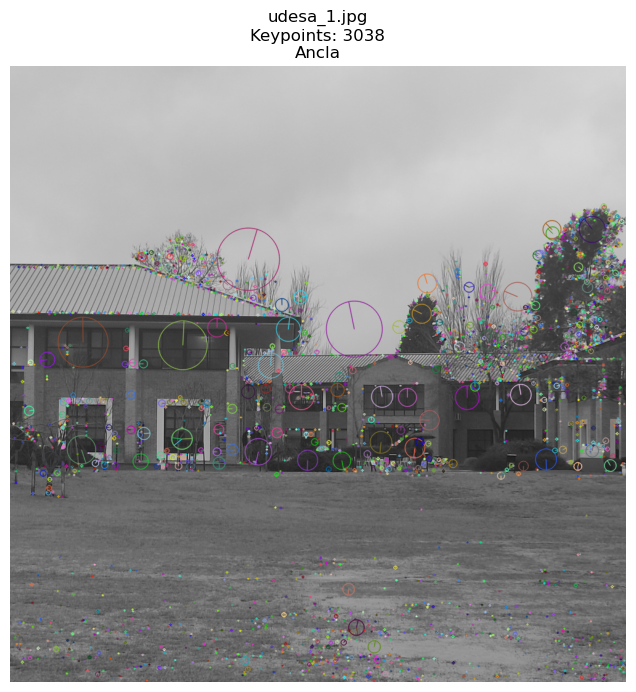

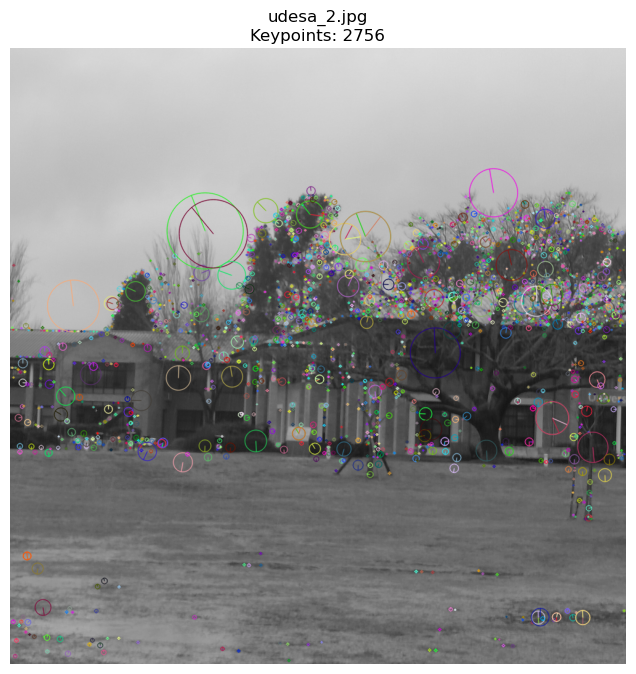

In [4]:
# SIFT y visualización de keypoints
sift = cv2.SIFT_create()

kps_udesa, descs_udesa = [], []
for idx, img_udesa_gray in enumerate(imgs_udesa_gray):
    kp, desc = sift.detectAndCompute(img_udesa_gray, None)
    kps_udesa.append(kp)
    descs_udesa.append(desc)

    # Visualización de keypoints
    visualize_keypoints(UDESA, idx, img_udesa_gray, kp, ANCHOR_IDX)

### (2)

In [ ]:
udesa_data = {
    "imgs": UDESA,
    "imgs_rgb": imgs_udesa_rgb,
    "imgs_gray": imgs_udesa_gray,
    "kps": kps_udesa,
    "descs": descs_udesa,
    "andor_idx": ANCHOR_IDX
}

# Adaptative Non-Maximal Suppression (ANMS)
kps_udesa_anms, descs_udesa_anms = [], []
for idx, (kps, descs) in enumerate(zip(kps_udesa, descs_udesa)):
    kps_anms, descs_anms = anms_select(kps, descs)
    kps_udesa_anms.append(kps_anms)
    descs_udesa_anms.append(descs_anms)
    print(f"{UDESA[idx]}: {len(kps)} keypoints -> {len(kps_anms)} después de ANMS")

# Visualización de keypoints antes vs. después de ANMS
for idx, (img_udesa_gray, kps, kps_anms) in enumerate(zip(imgs_udesa_gray, kps_udesa, kps_udesa_anms)):
    img_kp = cv2.drawKeypoints(
        img_udesa_gray, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    img_kp_anms = cv2.drawKeypoints(
        img_udesa_gray, kps_anms, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img_kp)
    plt.title(f"{UDESA[idx]}\nKeypoints: {len(kps)}" + ("\nAncla" if idx == ANCHOR_IDX else ""))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_kp_anms)
    plt.title(f"{UDESA[idx]} + ANMS\nKeypoints: {len(kps_anms)}" + ("\nAncla" if idx == ANCHOR_IDX else ""))
    plt.axis("off")

    plt.show()

udesa_0.jpg: 3118 keypoints -> 800 después de ANMS
udesa_1.jpg: 3038 keypoints -> 800 después de ANMS
udesa_2.jpg: 2756 keypoints -> 800 después de ANMS


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'drawKeypoints'
> Overload resolution failed:
>  - Can't parse 'keypoints'. Input argument doesn't provide sequence protocol
>  - Can't parse 'keypoints'. Input argument doesn't provide sequence protocol


### CUADRO
### (1)

In [10]:
# Carga y procesamiento de imágenes (CUADRO)
imgs_cuadro_rgb, imgs_cuadro_gray = [], []
for c in CUADRO:
    img_rgb = imread_rgb(IMG_DIR / c)
    img_rgb = resize_width(img_rgb, RESIZE_W)
    imgs_cuadro_rgb.append(img_rgb)
    img_cuadro_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    imgs_cuadro_gray.append(img_cuadro_gray)

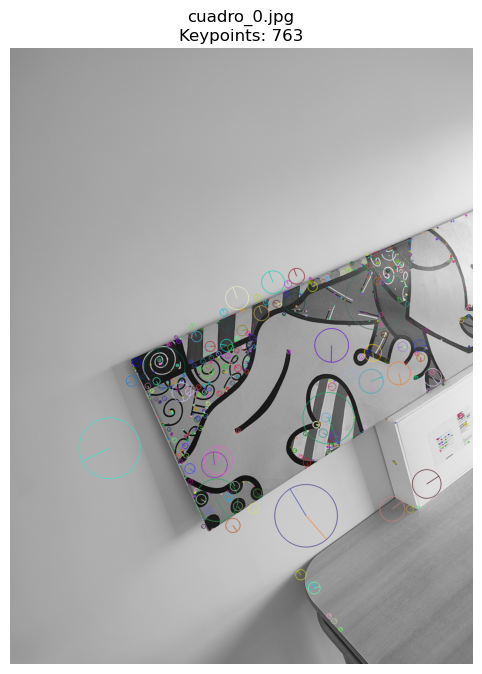

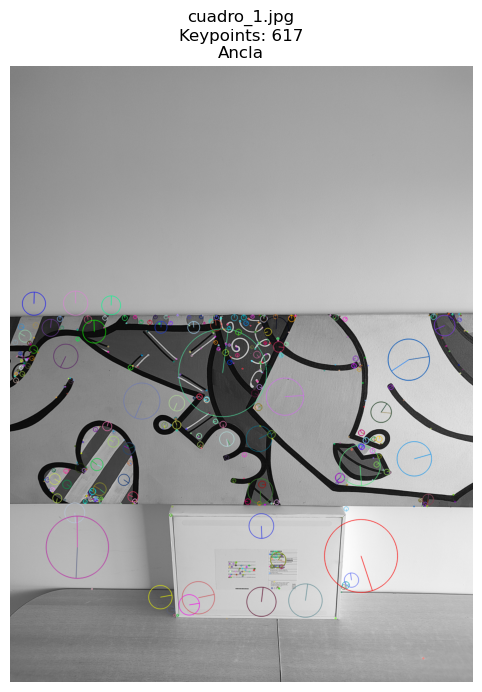

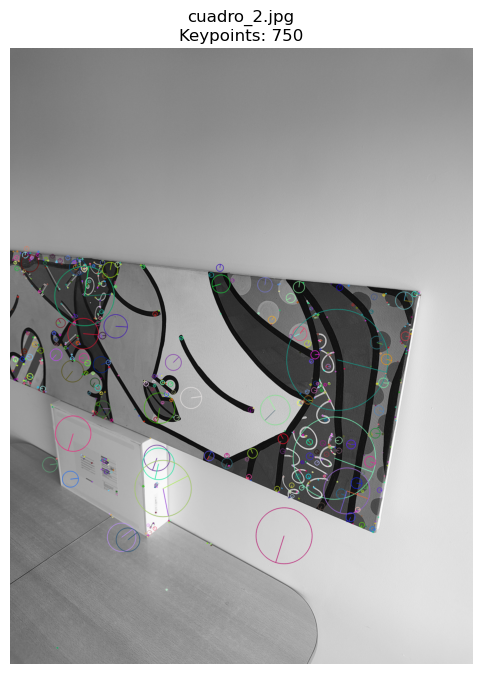

In [11]:
# SIFT y visualización de keypoints
kps_cuadro, descs_cuadro = [], []
for idx, img_cuadro_gray in enumerate(imgs_cuadro_gray):
    kp, desc = sift.detectAndCompute(img_cuadro_gray, None)
    kps_cuadro.append(kp)
    descs_cuadro.append(desc)

    # Visualización de keypoints
    visualize_keypoints(CUADRO, idx, img_cuadro_gray, kp, ANCHOR_IDX)

### (2)

cuadro_0.jpg: 763 keypoints -> 763 después de ANMS
cuadro_1.jpg: 617 keypoints -> 617 después de ANMS
cuadro_2.jpg: 750 keypoints -> 750 después de ANMS


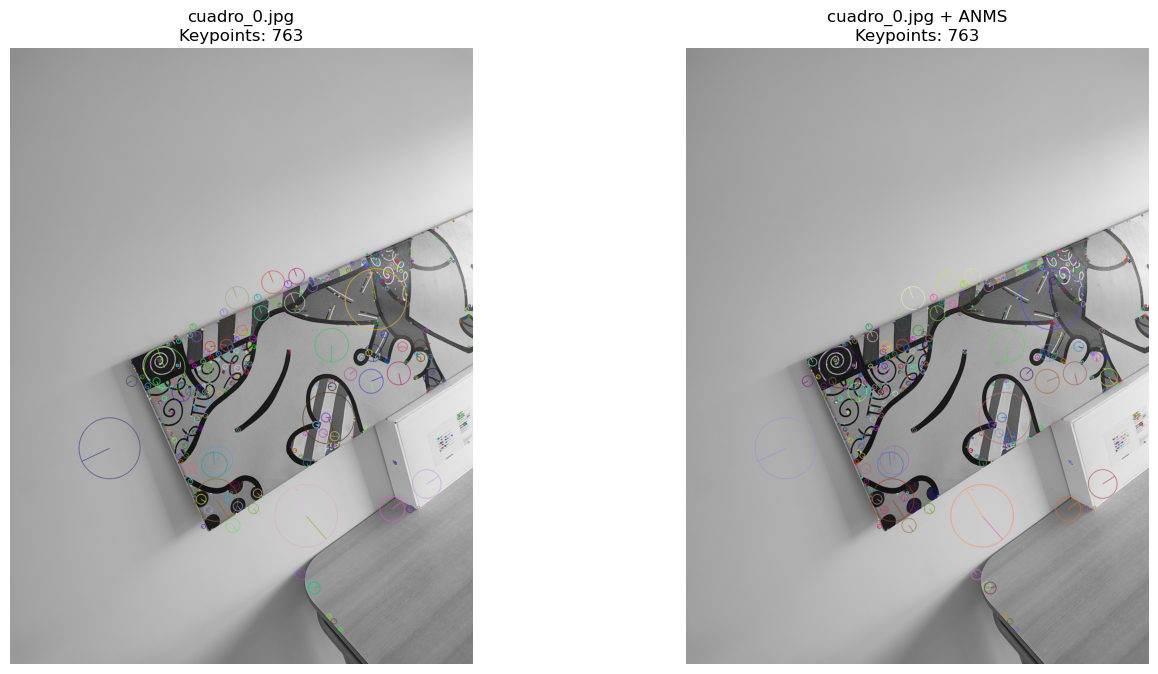

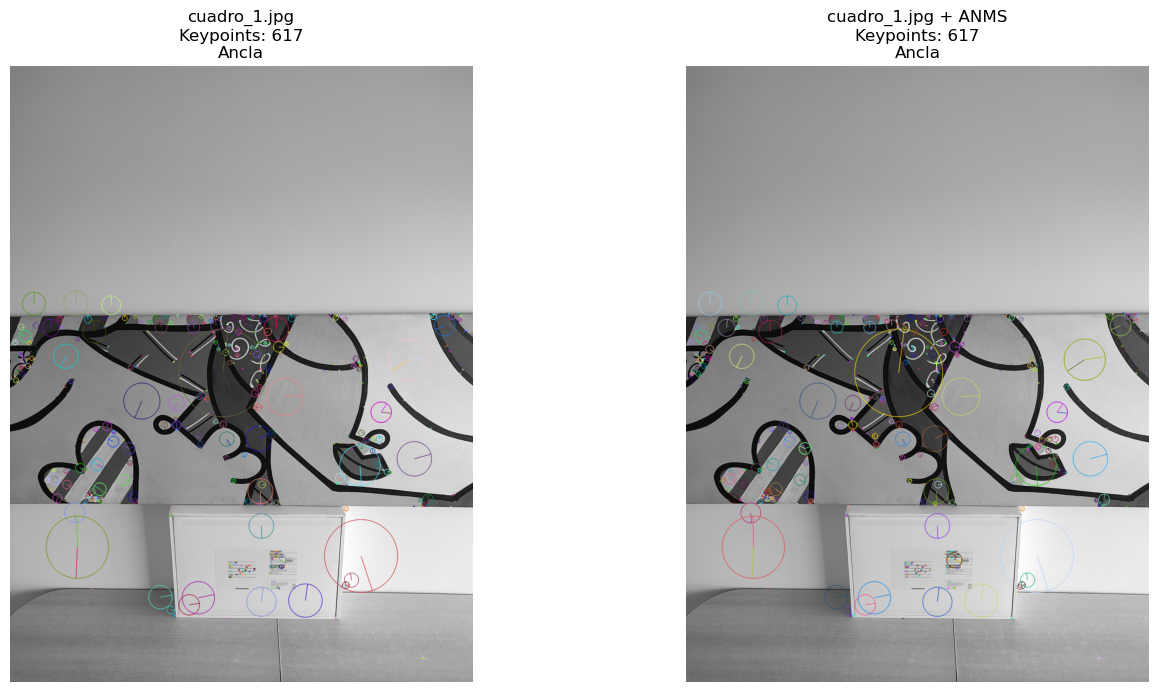

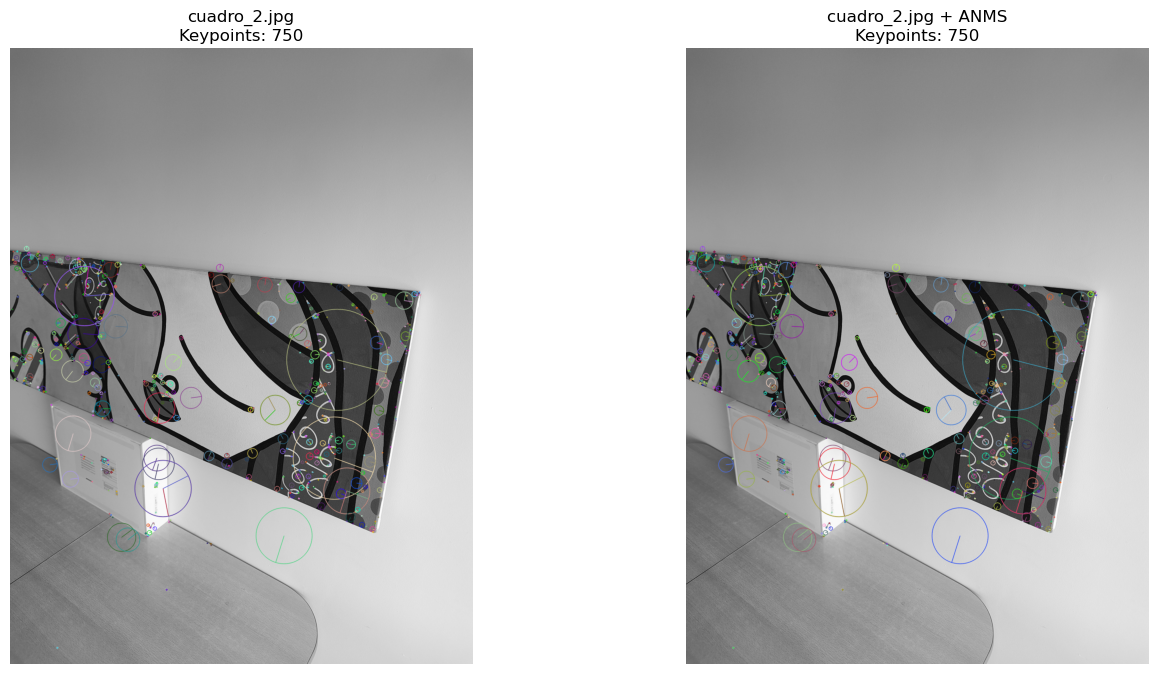

In [ ]:
cuadro_data = {
    "imgs": CUADRO,
    "imgs_rgb": imgs_cuadro_rgb,
    "imgs_gray": imgs_cuadro_gray,
    "kps": kps_cuadro,
    "descs": descs_cuadro,
    "andor_idx": ANCHOR_IDX
}

# Adaptative Non-Maximal Suppression (ANMS)
kps_cuadro_anms, descs_cuadro_anms = [], []
for idx, (kps, descs) in enumerate(zip(kps_cuadro, descs_cuadro)):
    kps_anms, descs_anms = anms_select(kps, descs)
    kps_cuadro_anms.append(kps_anms)
    descs_cuadro_anms.append(descs_anms)
    print(f"{CUADRO[idx]}: {len(kps)} keypoints -> {len(kps_anms)} después de ANMS")

# Visualización de keypoints antes vs. después de ANMS
for idx, (img_cuadro_gray, kps, kps_anms) in enumerate(zip(imgs_cuadro_gray, kps_cuadro, kps_cuadro_anms)):
    img_kp = cv2.drawKeypoints(
        img_cuadro_gray, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    img_kp_anms = cv2.drawKeypoints(
        img_cuadro_gray, kps_anms, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img_kp)
    plt.title(f"{CUADRO[idx]}\nKeypoints: {len(kps)}" + ("\nAncla" if idx == ANCHOR_IDX else ""))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_kp_anms)
    plt.title(f"{CUADRO[idx]} + ANMS\nKeypoints: {len(kps_anms)}" + ("\nAncla" if idx == ANCHOR_IDX else ""))
    plt.axis("off")

    plt.show()